# Prediction

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN


In [2]:
df = pd.read_excel('cosument_staple.xlsx')
df.columns
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
df.head()

,filename,text,cik_x,date,grade,clean_text,positive_sentiment_mean,positive_sentiment_std,negetive_sentiment_mean,negetive_sentiment_std,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
0,./data/processed/txt/fallen/0001144519_2005-12...,10-K 1 a06-6603_110k.htm ANNUAL REPORT PURSUAN...,1144519,0,fallen,10k 1 a066603110k.htm annual report pursuant s...,0.116778,0.159499,0.043752,0.098366,...,1.0,2040.0,250.0,978.0,B,MO,0.0,www.bunge.com,NaN,NaN
1,./data/processed/txt/fallen/0000027500_2001-11...,10-Q 1 d93287e10-q.txt FORM 10-Q FOR QUARTER E...,27500,0,fallen,10q 1 d93287e10q.txt form 10q quarter ended no...,0.020338,0.090538,0.004755,0.044588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,./data/processed/txt/fallen/0000095521_2005-12...,10-Q 1 d10q.htm FORM 10-Q Form 10-Q UNITED STA...,95521,0,fallen,10q 1 d10q.htm form 10q form 10q united state ...,0.112517,0.163165,0.023437,0.069721,...,1.0,5141.0,217.0,978.0,B-,MN,0.0,www.supervalu.com,22/10/2018,NaN
3,./data/processed/txt/fallen/0000003333_2005-05...,10-Q 1 v09820e10vq.htm FORM 10-Q e10vq Table o...,3333,0,fallen,10q 1 v09820e10vq.htm form 10q e10vq table con...,0.119319,0.158512,0.045622,0.107093,...,1.0,5411.0,440.0,978.0,B+,ID,0.0,NaN,02/06/2006,NaN
4,./data/processed/txt/fallen/0001016179_2001-06...,10-Q 1 p65397e10-q.htm 10-Q e10-q UNITED STATE...,1016179,0,fallen,10q 1 p65397e10q.htm 10q e10q united state sec...,0.103316,0.156175,0.024699,0.084460,...,1.0,2840.0,320.0,978.0,NaN,AZ,0.0,www.dialsoap.com,30/03/2004,30/07/1996


In [3]:
#dropping columns with over 10% missing values
for i in df:
    if(df[i].isna().sum() > 6):
        df.drop(i,axis=1,inplace=True)
df = df.dropna()

In [4]:
#changing from string to numeric
df['grade'] = df['grade'].apply(lambda x: 1 if x == 'fallen' else 0)
df['grade'].value_counts()

0    90
1    28
Name: grade, dtype: int64

In [5]:
#dropping non_numeric columns
drop_non_numeric = []
for i in df.columns:
    if(df[i].dtype == 'O'):
        drop_non_numeric.append(i)

df.drop(drop_non_numeric, axis=1,inplace=True)

In [6]:
#dropping cols with 0 standard deviation
for i in df:
    if(df[i].std() == 0.0):
        df.drop(i, axis=1,inplace=True)

In [7]:
#drop cols with low unique values
low_unique = []
for i in range(5, len(df.columns)):
    if(len(df.iloc[:,i].value_counts()) <= 11):
        low_unique.append(df.columns[i])
        
df.drop(low_unique, axis=1,inplace=True)    

In [8]:
#manually dropping some other columns
drop_cols = ['cik_x','cik_year','year','gvkey','fyear']
df.drop(drop_cols, axis=1,inplace=True)

In [9]:
#scaling the financial data
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,8:])

Text(0, 0.5, 'Explained variance')

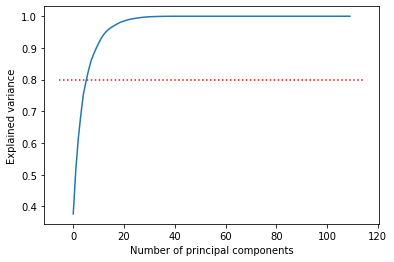

In [10]:
#finding principal components to reduce dimensionality and remove the correlation between the variables
pca = PCA(n_components=110)
pca.fit(X)

plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum()))
plt.hlines(y = 0.8, xmin= plt.gca().get_xlim()[0], xmax= plt.gca().get_xlim()[1], colors= 'red', linestyles='dotted')
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance')
# pd.Series(pca.explained_variance_ratio_.cumsum())[:7]

In [11]:
#choose 20 principal components and add to the dataset
prin_components = 7
pca = PCA(n_components= prin_components)
transformed = pca.fit_transform(X)
names = []
root = 'Prin_'
for i in range(1,prin_components+1):
    names.append(root + str(i))  
df = df.iloc[:,0:8]
df[names] = transformed

In [12]:
#reset index
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

## Correlation plot

In [13]:
import seaborn as sns

,grade,positive_sentiment_mean,positive_sentiment_std,negetive_sentiment_mean,negetive_sentiment_std,total_words,risky_words,fog_index
grade,1.000000,0.033370,0.075011,-0.010071,0.005221,0.293760,0.207100,-0.187317
positive_sentiment_mean,0.033370,1.000000,0.719720,0.610611,0.497357,-0.018052,-0.044288,-0.567128
positive_sentiment_std,0.075011,0.719720,1.000000,0.129129,0.080149,0.180884,0.111450,-0.459706
negetive_sentiment_mean,-0.010071,0.610611,0.129129,1.000000,0.944566,-0.219537,-0.079659,-0.324373
negetive_sentiment_std,0.005221,0.497357,0.080149,0.944566,1.000000,-0.226877,-0.141219,-0.287474
total_words,0.293760,-0.018052,0.180884,-0.219537,-0.226877,1.000000,0.863380,-0.421063
risky_words,0.207100,-0.044288,0.111450,-0.079659,-0.141219,0.863380,1.000000,-0.342969
fog_index,-0.187317,-0.567128,-0.459706,-0.324373,-0.287474,-0.421063,-0.342969,1.000000


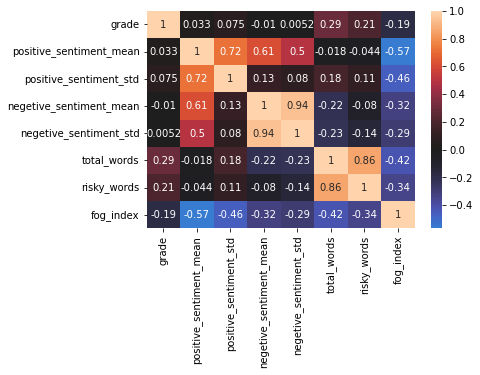

In [14]:
sns.heatmap(df.iloc[:,:8].corr(), center= 0, annot= True)
df.iloc[:,:8].corr()

In [15]:
df.groupby(['grade'])['positive_sentiment_mean','negetive_sentiment_mean'].agg(['mean', 'std','count'])

/var/folders/y3/v6fyb_rs72bcn7ftc3lvwvmw0000gn/T/ipykernel_72854/3234124924.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['grade'])['positive_sentiment_mean','negetive_sentiment_mean'].agg(['mean', 'std','count'])


positive_sentiment_mean                 negetive_sentiment_mean  \
                         mean       std count                    mean   
grade                                                                   
0                    0.096337  0.021849    90                0.035831   
1                    0.097985  0.018847    28                0.035471   

                       
            std count  
grade                  
0      0.015113    90  
1      0.016088    28

In [16]:
df.columns
df.to_csv('ready_prediction.csv', index= False)

# Making predictions

In [17]:
df = pd.read_csv('ready_prediction.csv')
df.head()

,grade,positive_sentiment_mean,positive_sentiment_std,negetive_sentiment_mean,negetive_sentiment_std,total_words,risky_words,fog_index,Prin_1,Prin_2,Prin_3,Prin_4,Prin_5,Prin_6,Prin_7
0,1,0.116778,0.159499,0.043752,0.098366,39397,72,12.034930,-3.074640,-2.380002,2.762110,-3.849244,6.780101,-0.551360,1.993345
1,1,0.112517,0.163165,0.023437,0.069721,7228,7,15.203633,-3.699426,3.808443,0.529490,-0.473043,-1.151270,-0.831529,-0.660592
2,1,0.119319,0.158512,0.045622,0.107093,9659,4,14.915270,7.983510,-0.302242,0.623295,-0.569538,-2.182751,-1.319191,-0.575629
3,1,0.103316,0.156175,0.024699,0.084460,6439,3,15.558712,-7.179240,8.942990,-1.178760,0.651984,-0.739280,-1.183608,0.836427
4,1,0.052281,0.121900,0.013744,0.062331,5392,3,13.909565,8.179785,0.518949,-0.215438,0.291537,-1.366998,-1.128439,-0.270722


In [18]:
Y = df.iloc[:,0]
X = df.iloc[:,1:]

In [44]:
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn import metrics

def print_confusion(model, X_test, y_test, plots):
    y_pred_proba = model.predict_proba(X_test)[::,1]

    #create ROC curve
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    # # Youden’s J statistic
    # metric = tpr - fpr
    # GMean Statistic
    metric = np.sqrt(tpr*(1-fpr))

    # Find index of largest value
    ix = np.argmax(metric)
    
    threshold = round(_[ix],4)
    
    y_pred = np.where(y_pred_proba > threshold, 1, 0)
    test_acc = (y_test == y_pred).mean()
    
    if (y_test == model.predict(X_test)).mean() > test_acc:
        threshold = 0.5

    train_acc = (y_train == np.where(model.predict_proba(X_train)[::,1] > threshold, 1, 0)).mean()
    print('\tTraining accuracy', round(train_acc,2))
    

    print('\tTest accuracy', round(test_acc,2))
    print()
    

    cf_matrix = confusion_matrix(y_test, y_pred)

    if plots:
        fig, ax = plt.subplots(1,2, figsize=(10, 5))

        ax[0].plot(fpr,tpr,label="AUC="+str(round(auc,4)))
        ax[0].plot([0,1], [0,1], linestyle='--', label='No Skill')
        ax[0].scatter(fpr[ix], tpr[ix], marker='o', color='black', label= f'Best at {round(threshold, 4)}')
        ax[0].legend(loc=4)
        ax[0].set_ylabel('True Positive Rate')
        ax[0].set_xlabel('False Positive Rate')
        ax[0].set_title('ROC Curve')
        # plt.show()

        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
        # group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
        # labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        
        ax[1] = sns.heatmap(cf_matrix, annot= labels, fmt= '', cmap='Blues')
        ax[1].set_xlabel('Actual')
        ax[1].set_ylabel('Predicted')
        ax[1].set_xticklabels(['Fallen','Not Fallen'])
        ax[1].set_yticklabels(['Fallen','Not Fallen'])
        ax[1].set_title(f'Confusion Matrix @ threshold = {round(threshold,2)}')
        plt.show()
    return train_acc, test_acc


In [48]:

def model_v2(X_train, X_test, y_train, y_test, plots = True):    
    #logistic regression classifier (scale total words etc)
    lr = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
    print('Logistic Regression:')
    lr_train, lr_test = print_confusion(lr, X_test, y_test, plots)
   
    #random forest classifier
    rf = RandomForestClassifier(n_estimators = 100, random_state=0, criterion= 'gini')
    rf.fit(X_train, y_train)
    print('Random Forest:')
    rf_train, rf_test = print_confusion(rf, X_test, y_test, plots)
    
    #gradient boosting classifier
    gb = GradientBoostingClassifier(n_estimators=20,max_depth= 2, random_state=0)
    gb.fit(X_train, y_train)
    print('Gradient Boosting:')
    gb_train, gb_test = print_confusion(gb, X_test, y_test, plots)
    
    if plots:
        plt_train = [lr_train, rf_train, gb_train]
        plt_test = [lr_test, rf_test, gb_test]
        value = ['LR','RF','GBM']
        fig, ax = plt.subplots(1,2, sharex= True, sharey= True)
        ax[0].bar(height = plt_train, x= value)
        ax[0].set_title('Training Accuracy')
        ax[1].set_title('Test Accuracy')
        ax[1].bar(height = plt_test, x= value)
        plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model_v2(X_train, X_test, y_train, y_test, plots = False)

Logistic Regression:
	Training accuracy 0.77
	Test accuracy 0.75

Random Forest:
	Training accuracy 0.99
	Test accuracy 0.58

Gradient Boosting:
	Training accuracy 0.87
	Test accuracy 0.62



But there is class imbalance, so lets sample the data and try again

Logistic Regression:
	Training accuracy 0.49
	Test accuracy 0.47



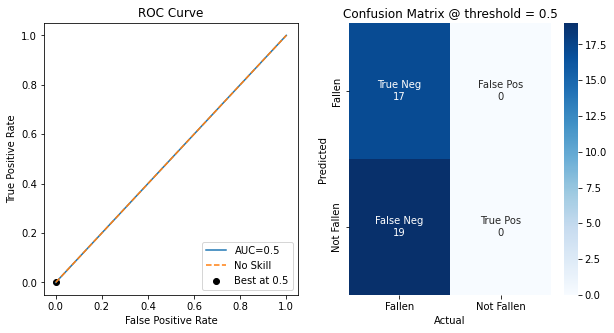

Random Forest:
	Training accuracy 0.99
	Test accuracy 0.89



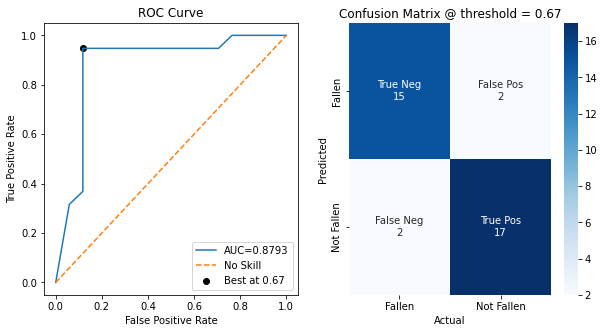

Gradient Boosting:
	Training accuracy 0.92
	Test accuracy 0.86



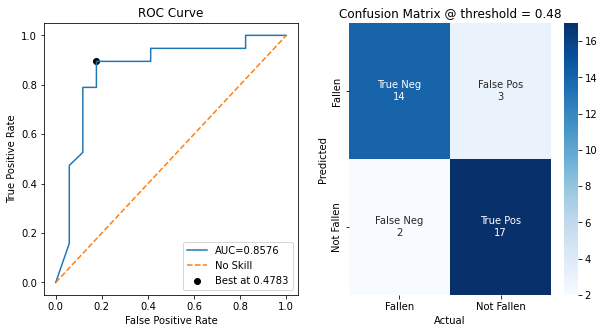

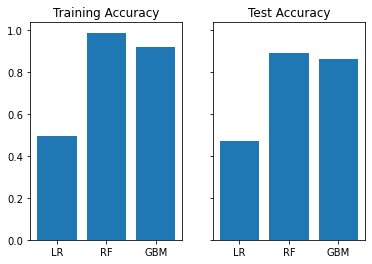

In [50]:
#random oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
# oversample = RandomOverSampler(sampling_strategy='auto')

X_oversampled, Y_oversampled = oversample.fit_resample(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, Y_oversampled, test_size=0.2, random_state=42)
# model_v2(X_train, X_test, y_train, y_test, plots = False)
model_v2(X_train, X_test, y_train, y_test)#, plots = False)

In [51]:
#SMOTE
smote = SMOTE(sampling_strategy='minority', k_neighbors=3)
X_smote, Y_smote = smote.fit_resample(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)
model_v2(X_train, X_test, y_train, y_test, plots = False)

Logistic Regression:
	Training accuracy 0.49
	Test accuracy 0.47

Random Forest:
	Training accuracy 1.0
	Test accuracy 0.81

Gradient Boosting:
	Training accuracy 0.9
	Test accuracy 0.78

